<a href="https://colab.research.google.com/github/Afarisphi/ML-for-Stock/blob/main/ML_Stock%20Forecase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries and data

In [99]:
!pip install mplfinance


In [100]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from IEX
from datetime import datetime
import pandas_datareader.data as web

# For time stamps
from datetime import datetime
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [101]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39221300,AMAZON
2024-04-09,187.240005,187.339996,184.199997,185.669998,185.669998,36546900,AMAZON
2024-04-10,182.770004,186.270004,182.669998,185.949997,185.949997,35879200,AMAZON
2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700,AMAZON
2024-04-12,187.720001,188.380005,185.080002,186.130005,186.130005,38554300,AMAZON


## Descriptive statistics about data

In [102]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,181.023785,182.492311,179.697729,181.180996,180.754595,5.761730e+07
std,8.950970,8.798666,8.868189,8.835075,8.857597,1.762522e+07
min,163.059998,165.279999,162.800003,163.759995,162.890533,2.404830e+07
25%,173.154999,174.650002,172.005005,173.690002,173.265121,4.670805e+07
50%,180.669998,182.229996,178.550003,180.710007,180.238220,5.363130e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909798,6.267560e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [103]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-14 to 2024-04-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Historical view of the closing price

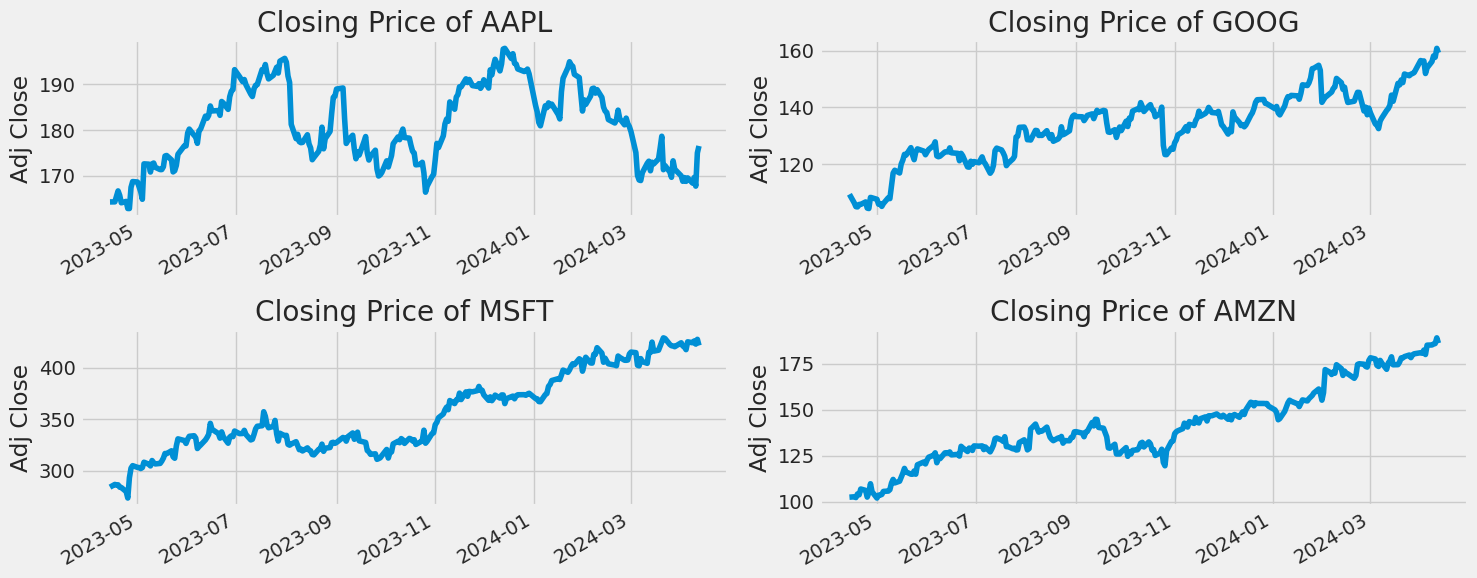

In [104]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Moving average of stocks

In [105]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

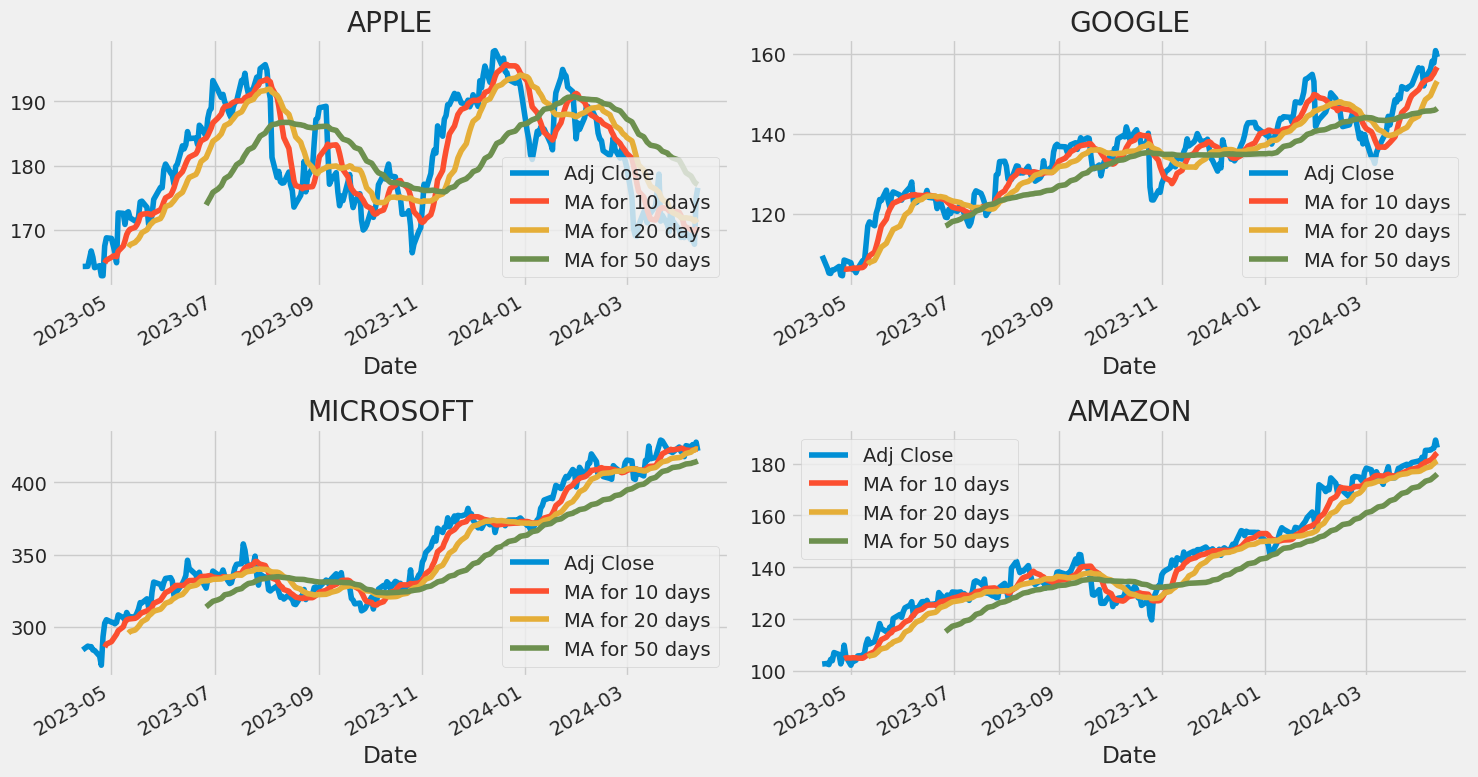

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Predicting the closing price stock price of APPLE inc

In [107]:
api_key = 'pk_43802bf066b94613b17ac83b7938cf9b'

# Mulai dan akhir periode yang Anda inginkan
start = datetime(2012, 1, 1)
end = datetime.now()

# Gunakan fungsi DataReader untuk mendapatkan data saham dari IEX Cloud
# Ganti 'AAPL' dengan simbol saham yang Anda inginkan
df = web.DataReader('AAPL', 'iex', start, end, api_key=api_key)

# Tampilkan data
print(df)

              open    high     low   close      volume
date                                                  
2012-01-03  409.50  412.49  409.00  411.23   2303856.0
2012-01-04  410.20  414.68  409.31  413.44   1619815.0
2012-01-05  414.95  418.53  412.69  418.03   1645338.0
2012-01-06  419.77  422.74  419.22  422.45   2155962.0
2012-01-09  425.52  427.70  421.36  421.75   2853606.0
...            ...     ...     ...     ...         ...
2024-04-08  168.99  169.19  168.24  168.45  12564703.0
2024-04-09  168.70  170.07  168.35  169.67  14642690.0
2024-04-10  168.85  169.08  167.12  167.78  15529460.0
2024-04-11  168.25  175.45  168.17  175.04  28440589.0
2024-04-12  174.25  178.35  174.21  176.55  29537314.0

[3095 rows x 5 columns]


Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')


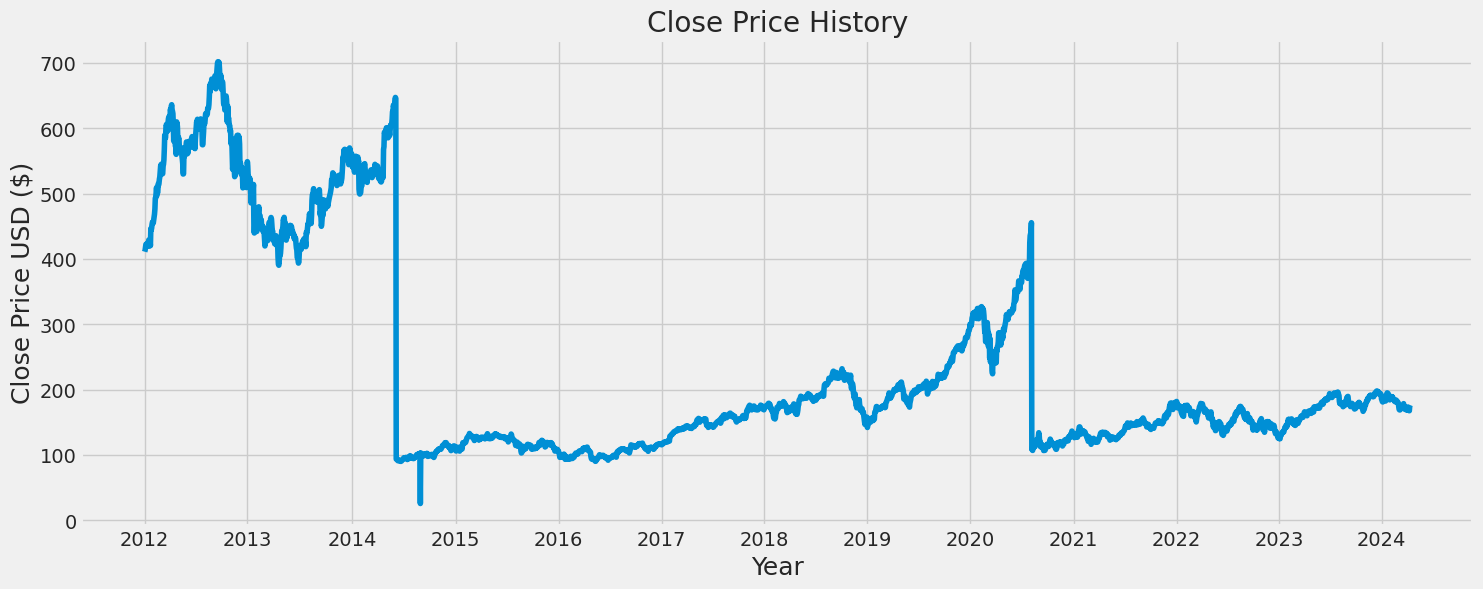

In [120]:
# Print column names
print(df.columns)

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df.index, df['close'])  # Assuming 'close' is the column name for close prices
plt.xlabel('Year', fontsize=18)  # Change xlabel to 'Year'
plt.ylabel('Close Price USD ($)', fontsize=18)

# Extracting year from the index and set as xticks
years = [int(date.split('-')[0]) for date in df.index]
unique_years = sorted(set(years))  # Get unique years
plt.xticks([years.index(year) for year in unique_years], unique_years)  # Show ticks for each unique year

plt.show()


In [109]:
# Create a new dataframe with only the 'Close column
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2941

In [110]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.5698939 ],
       [0.57316181],
       [0.57994899],
       ...,
       [0.20990721],
       [0.22064249],
       [0.22287531]])

In [111]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.5698939 , 0.57316181, 0.57994899, 0.58648479, 0.58544971,
       0.58765295, 0.58663266, 0.58491738, 0.58281764, 0.58981184,
       0.59633285, 0.59432184, 0.58330561, 0.59383387, 0.58360135,
       0.62228383, 0.61904551, 0.62320062, 0.63167351, 0.63680455,
       0.63637573, 0.63479354, 0.64153636, 0.64787993, 0.65506636,
       0.66667406, 0.69105763, 0.69182655, 0.70500166, 0.71514547,
       0.69771173, 0.70492773, 0.70429189, 0.7231156 , 0.72043917,
       0.72539278, 0.73429448, 0.73924809, 0.75351743, 0.76391261,
       0.76691435, 0.76796422, 0.75036782, 0.74591697, 0.74653802,
       0.7632472 , 0.76794943, 0.77804887, 0.80185575, 0.83361798,
       0.82767365, 0.82768844, 0.85065247, 0.8578389 , 0.85272264,
       0.84785775, 0.84283021, 0.85934716, 0.87043732, 0.8750804 ])]
[0.8636057816716574]

[array([0.5698939 , 0.57316181, 0.57994899, 0.58648479, 0.58544971,
       0.58765295, 0.58663266, 0.58491738, 0.58281764, 0.58981184,
       0.59633285, 0.59432184, 0.583

In [112]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=2, epochs=2)

Epoch 1/2
1441/1441 [==============================] - 91s 57ms/step - loss: 0.0025
Epoch 2/2
1441/1441 [==============================] - 75s 52ms/step - loss: 9.6001e-04


In [113]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 33ms/step


3.8978722327916153

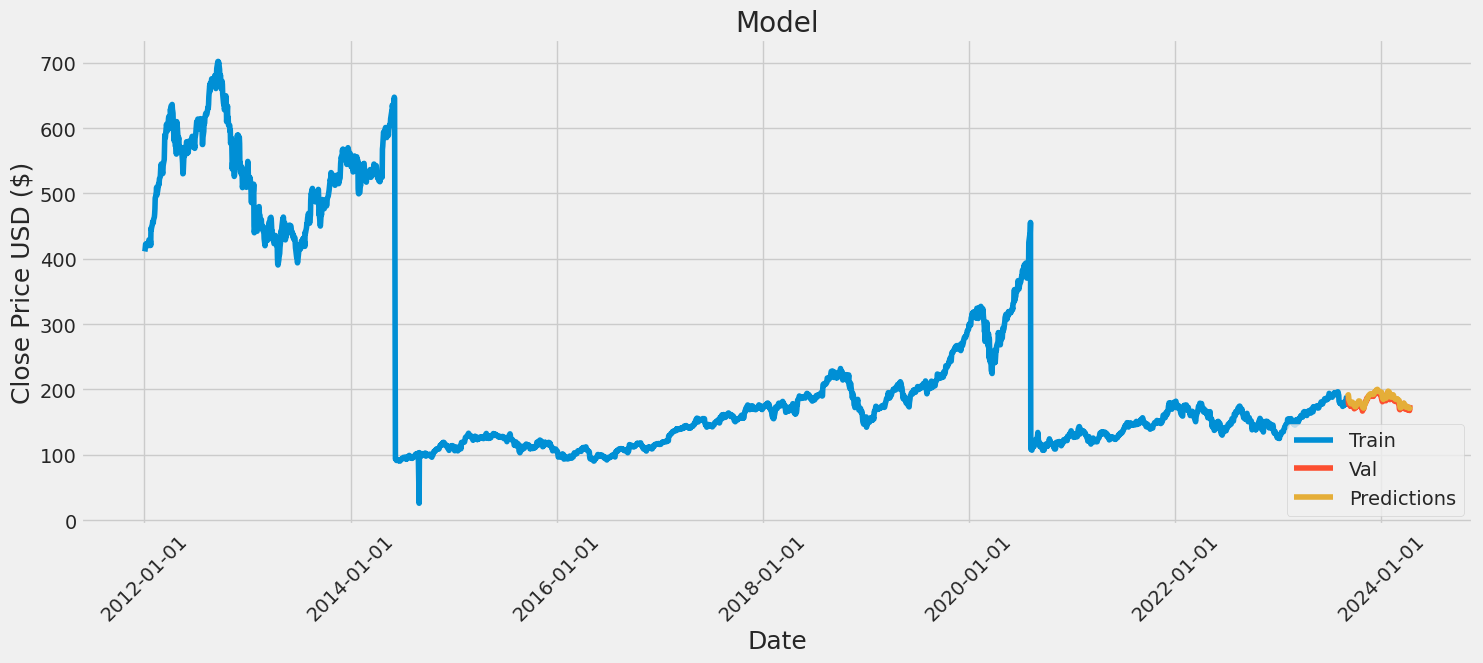

In [115]:
# Set the figure size
plt.figure(figsize=(16,6))

# Plot train data
plt.plot(train.index, train['close'], label='Train')

# Plot validation data
plt.plot(valid.index, valid['close'], label='Val')

# Plot predictions
plt.plot(valid.index, valid['Predictions'], label='Predictions')

# Plot candlestick chart for train data
candlestick_ohlc(plt.gca(), zip(train_years, train['close'], train['close'], train['close'], train['close']), width=0.6, colorup='g', colordown='r')

# Set title, labels, and legend
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(loc='lower right')

# Set x-axis date format and rotation
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [116]:
valid


,close,Predictions
date,,
2023-09-01,189.46,189.315155
2023-09-05,189.70,190.982971
2023-09-06,182.91,191.850967
2023-09-07,177.56,189.317917
2023-09-08,178.18,184.627869
...,...,...
2024-04-08,168.45,171.901215
2024-04-09,169.67,171.620316
2024-04-10,167.78,171.844727
